In [1]:
import os
import sys
import time
import h5py
import pygrib

import numpy as np
import netCDF4 as nc
from glob import glob

from datetime import datetime, timedelta

In [2]:
sys.path.insert(0, '/glade/u/home/ksha/GAN_proj/')
sys.path.insert(0, '/glade/u/home/ksha/GAN_proj/libs/')

from namelist import *
import data_utils as du
import graph_utils as gu

In [3]:
# graph tools
import cmaps
import cartopy.crs as ccrs
import cartopy.mpl.geoaxes
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.colors as colors
import matplotlib.patches as patches
from matplotlib.collections import PatchCollection

from matplotlib import ticker
import matplotlib.ticker as mticker
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

%matplotlib inline

In [5]:
with h5py.File(save_dir+'CNN_domain.hdf', 'r') as h5io:
    lon_01 = h5io['lon_01'][...]
    lat_01 = h5io['lat_01'][...]
    lon_GFS = h5io['lon_GFS'][...]
    lat_GFS = h5io['lat_GFS'][...]    

In [34]:
with h5py.File('/glade/campaign/cisl/aiml/ksha/GFS/MRMS_y2021.hdf', 'r') as h5io:
    MRMS = h5io['MRMS'][...]

In [11]:
with h5py.File('/glade/campaign/cisl/aiml/ksha/GFS/GFS_2021_ini00_f03.hdf', 'r') as h5io:
    APCP = h5io['APCP'][...]

In [15]:
# Cartopy map settings
scale_param = '50m' # 10m for publication quality
# US states and CAN-US boundary
PROVINCE = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale=scale_param,
    facecolor='none')

In [26]:
cmap_pct, A = gu.precip_cmap()

Text(0.5, 1.0, '(b) MRMS QPE | 01-03Z 1 January 2021')

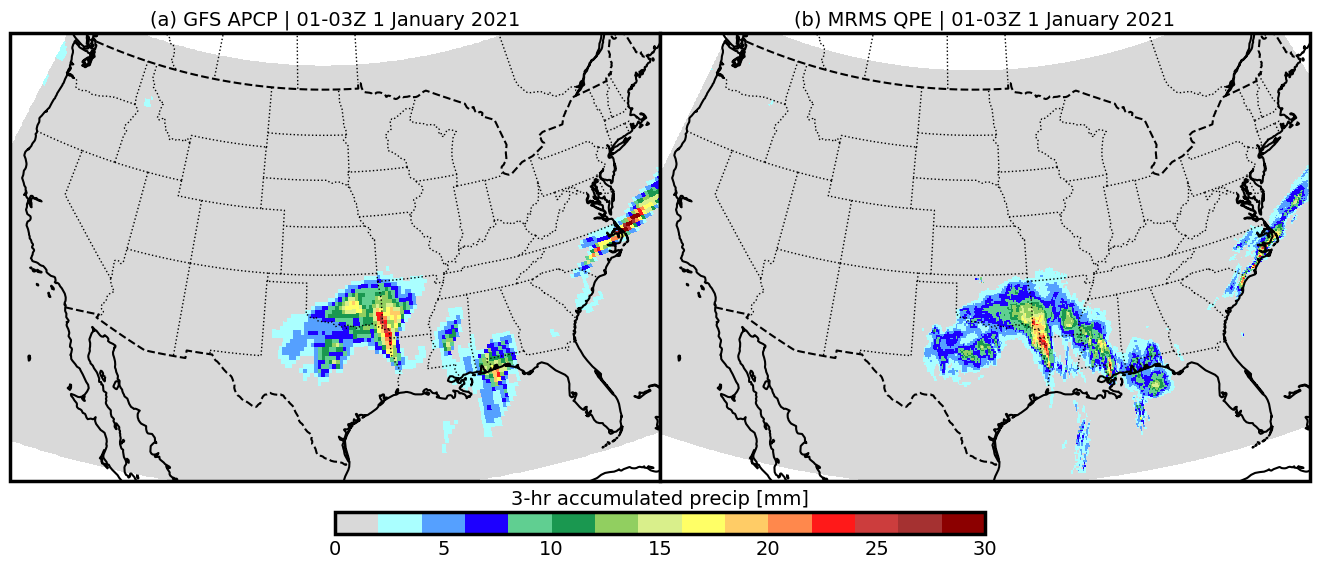

In [65]:
edge = [-118, -78, 25, 50.5]

fig = plt.figure(figsize=(13, 6)) #, dpi=dpi_
gs = gridspec.GridSpec(1, 2, height_ratios=[1,], width_ratios=[1, 1,])

proj_ = ccrs.NorthPolarStereo(central_longitude=-98.75)

ax1 = plt.subplot(gs[0, 0], projection=proj_)
ax2 = plt.subplot(gs[0, 1], projection=proj_)

for i, ax in enumerate([ax1, ax2]):
    ax.set_extent(edge, ccrs.PlateCarree())
    ax.add_feature(cfeature.COASTLINE.with_scale(scale_param), edgecolor='k', linewidth=1.5, zorder=5)
    ax.add_feature(cfeature.BORDERS.with_scale(scale_param), linestyle='--', linewidth=1.5, zorder=5)
    ax.add_feature(PROVINCE, edgecolor='k', linestyle=':', linewidth=1.0, zorder=5)
    ax.spines['geo'].set_linewidth(2.5)

plt.subplots_adjust(0, 0, 1, 1, hspace=0.0, wspace=0.0)

CS1 = ax1.pcolormesh(lon_GFS, lat_GFS, APCP[0, ...], vmin=0, vmax=30, cmap=cmap_pct, transform=ccrs.PlateCarree())

MRMS_ = MRMS[1, ...] + MRMS[2, ...] + MRMS[3, ...]
CS2 = ax2.pcolormesh(lon_01, lat_01, MRMS_, vmin=0, vmax=30, cmap=cmap_pct, transform=ccrs.PlateCarree())

ax_base = fig.add_axes([0.25, 0.0, 0.5, 0.075])
[j.set_linewidth(0.0) for j in ax_base.spines.values()]
ax_base.tick_params(axis='both', left=False, top=False, right=False, bottom=False, \
                    labelleft=False, labeltop=False, labelright=False, labelbottom=False)
cax = inset_axes(ax_base, height='50%', width='100%', borderpad=0, loc=2)
CBar = plt.colorbar(CS1, orientation='horizontal', ticks=[0, 5, 10, 15, 20, 25, 30], cax=cax)
CBar.ax.tick_params(axis='x', labelsize=14, direction='in', length=0)
CBar.outline.set_linewidth(2.5)
ax_base.text(0.5, 1.075, '3-hr accumulated precip [mm]', ha='center', va='bottom', fontsize=14, transform=ax_base.transAxes)

ax1.set_title('(a) GFS APCP | 01-03Z 1 January 2021', fontsize=14)
ax2.set_title('(b) MRMS QPE | 01-03Z 1 January 2021', fontsize=14)

In [41]:
np.max(MRMS_)

30.832000000000004

In [44]:
np.max(MRMS[3, ...])

16.595000000000002

(array([2.46847636e+00, 1.03900045e-01, 5.47477534e-02, 4.46539792e-02,
        3.12687569e-02, 2.96230329e-02, 2.67704445e-02, 1.92001139e-02,
        7.57033063e-03, 1.64572405e-03]),
 array([0.        , 0.35869851, 0.71739703, 1.07609554, 1.43479406,
        1.79349257, 2.15219109, 2.5108896 , 2.86958812, 3.22828663,
        3.58698515]),
 <BarContainer object of 10 artists>)

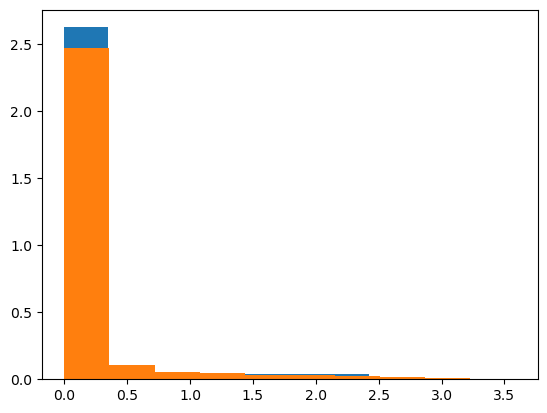

In [40]:
plt.hist(np.log(MRMS_+1).ravel(), density=True)
plt.hist(np.log(APCP[0, ...]+1).ravel(), density=True)

In [31]:
MRMS[1, ...]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

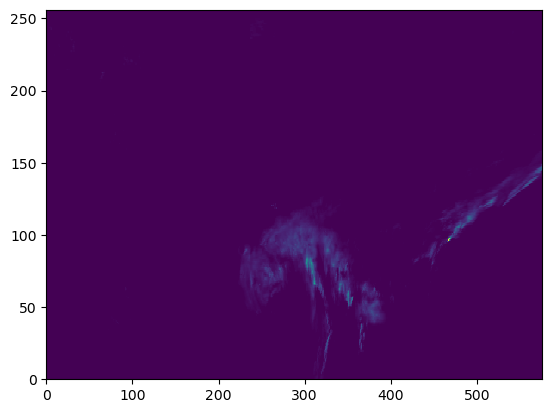

In [32]:
plt.pcolormesh(MRMS[1, ...])